# Ex2 - Getting and Knowing your Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import numpy as np

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [2]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')

### Step 4. See the first 10 entries

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [4]:
#Convert the data type of item_price into float, it is currently an object
chipo.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [5]:
chipo['item_price'] = chipo['item_price'].apply(lambda row: row.replace('$', ""))
chipo
#The dollar sign has been remove, now convert it into float using astype()

chipo['item_price'] = chipo['item_price'].astype('float')
chipo.dtypes
#Now our dtype for item_price is float

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

### Step 5. What is the number of observations in the dataset?

In [6]:
# Solution 1

chipo.shape #shows the number of rows, columns
chipo.shape[0] #numner of rows

4622

In [7]:
# Solution 2
chipo.info() #also shows rows and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


### Step 6. What is the number of columns in the dataset?

In [8]:
chipo.shape[1] #number of columns

5

### Step 7. Print the name of all the columns.

In [9]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

### Step 8. How is the dataset indexed?

In [10]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### Step 9. Which was the most-ordered item? 

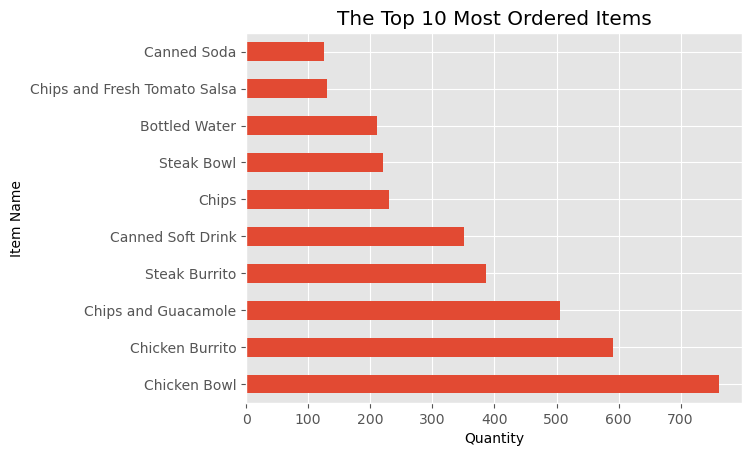

In [11]:
item_grouped = chipo.groupby('item_name')
ax = item_grouped.sum(numeric_only=True)['quantity'].sort_values(ascending=False)\
                .head(10)\
                .plot(kind='barh', title='The Top 10 Most Ordered Items')

ax.set_xlabel('Quantity')
ax.set_ylabel('Item Name')

plt.show()

### Step 10. For the most-ordered item, how many items were ordered?

In [12]:
#This groups our DataFrame by their 'item_name'
#Next is sum all numeric only values with .sum(numeric_only=True) if we only want to see column quantity just add ['quantity']
#Next is sort our quantity values in descending order and use function .head(1) to show the top result
item_grouped = chipo.groupby('item_name')
item_grouped.sum(numeric_only=True)['quantity'].sort_values(ascending=False)\
                .head(1)

item_name
Chicken Bowl    761
Name: quantity, dtype: int64

### Step 11. What was the most ordered item in the choice_description column?

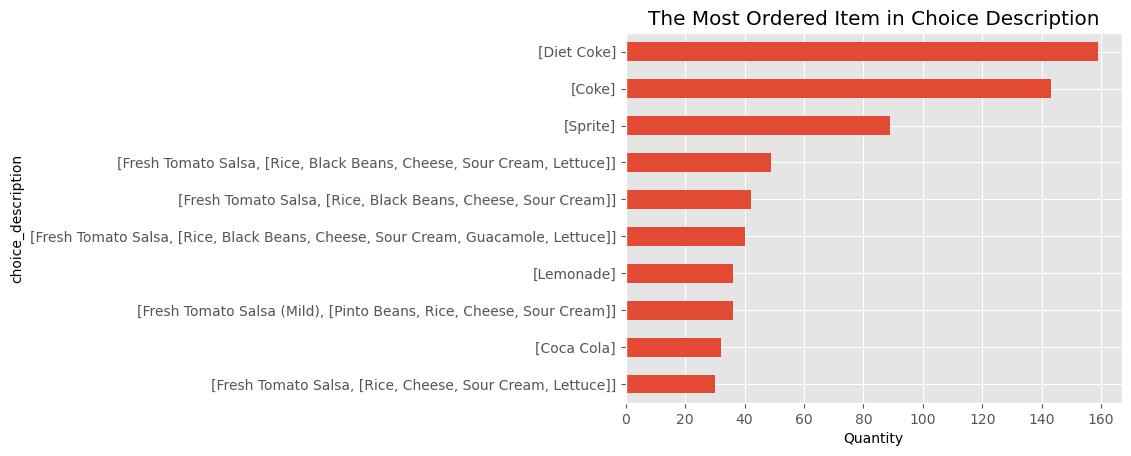

In [13]:
choice_grouped = chipo.groupby('choice_description')['quantity'].sum().sort_values(ascending=True).tail(10)\
                .plot(kind='barh', title='The Most Ordered Item in Choice Description')
choice_grouped.set_xlabel('Quantity')
plt.show()

### Step 12. How many items were orderd in total?

In [14]:
#Get the sum of all quantity of items, to see how many items were orders
chipo['quantity'].sum()

4972

### Step 13. Turn the item price into a float

#### Step 13.a. Check the item price type

In [15]:
chipo.item_price.dtype

dtype('float64')

#### Step 13.b. Create a lambda function and change the type of item price

In [16]:
#Already did in step 2.

#### Step 13.c. Check the item price type

In [17]:
chipo.item_price.dtype

dtype('float64')

### Step 14. How much was the revenue for the period in the dataset?

In [18]:
chipo['total'] = chipo.quantity * chipo.item_price
print("The total revenue for the period in this dataset is: $", chipo.total.sum())

The total revenue for the period in this dataset is: $ 39237.02


### Step 15. How many orders were made in the period?

In [19]:
#count each unique orders in order_id
total_orders = chipo.order_id.value_counts().count()
total_orders

1834

### Step 16. What is the average revenue amount per order?

In [34]:
# Solution 1
#Group them by their order_id and sum their total,
#Next, get their mean()
grouped_order_id = chipo.groupby('order_id')['total'].sum(numeric_only=True)

round(grouped_order_id.mean(),2)

21.39

In [37]:
# Solution 2



,order_id,quantity,item_name,choice_description,item_price,total
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75


### Step 17. How many different items are sold?

In [40]:
#How many unique items were sold
chipo.item_name.value_counts().count()

50